In [ ]:
%%capture
!pip install git+https://github.com/kornia/kornia

## Prepare the image

In [ ]:
%%capture
!wget 'https://image.shutterstock.com/image-photo/portrait-surprised-cat-scottish-straight-260nw-499196506.jpg' -O img.jpg

We can use can use OpenCV to load the image.

In [ ]:
import cv2

img = cv2.imread("img.jpg") # Download Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Define RGB

### Structuring element

In [ ]:
import torch
import kornia as K

device = 'cpu' # 'cuda:0' for GPU
kernel = torch.tensor([[0, 1, 0],[1, 1, 1],[0, 1, 0]]).to(device)

# to torch.tensor
img_t = K.image_to_tensor(img, keepdim=False)
img_t = img_t.float() / 255.

### Making plots!

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_morph_image(tensor):

  # kornia.tensor_to_image
  image = K.tensor_to_image(tensor.squeeze(0)) # Tensor to image

  # Plot before-after
  rcParams['figure.figsize'] = 20 ,20
  fig, ax = plt.subplots(1,2)
  ax[0].axis('off')
  ax[0].imshow(img)
  ax[1].axis('off')
  ax[1].imshow(image)

## Morphology

### Dilation

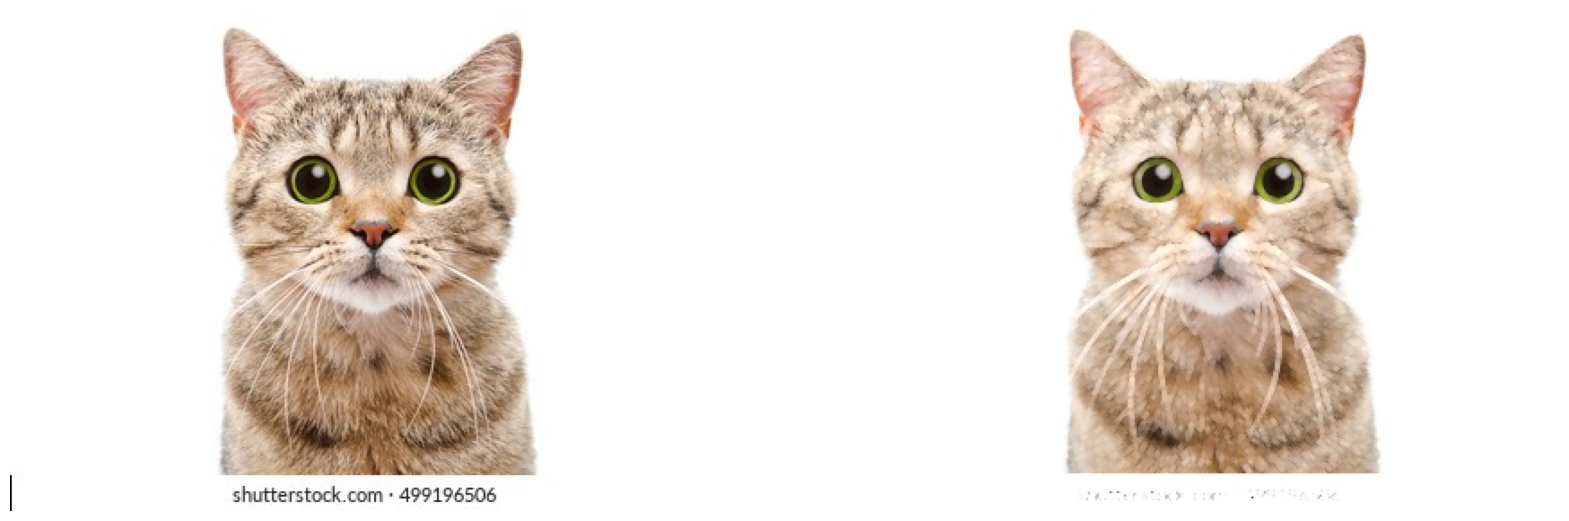

In [ ]:
from kornia import morphology as morph

dilated_image = morph.dilation(img_t, kernel) # Dilation
plot_morph_image(dilated_image) # Plot

### Erosion

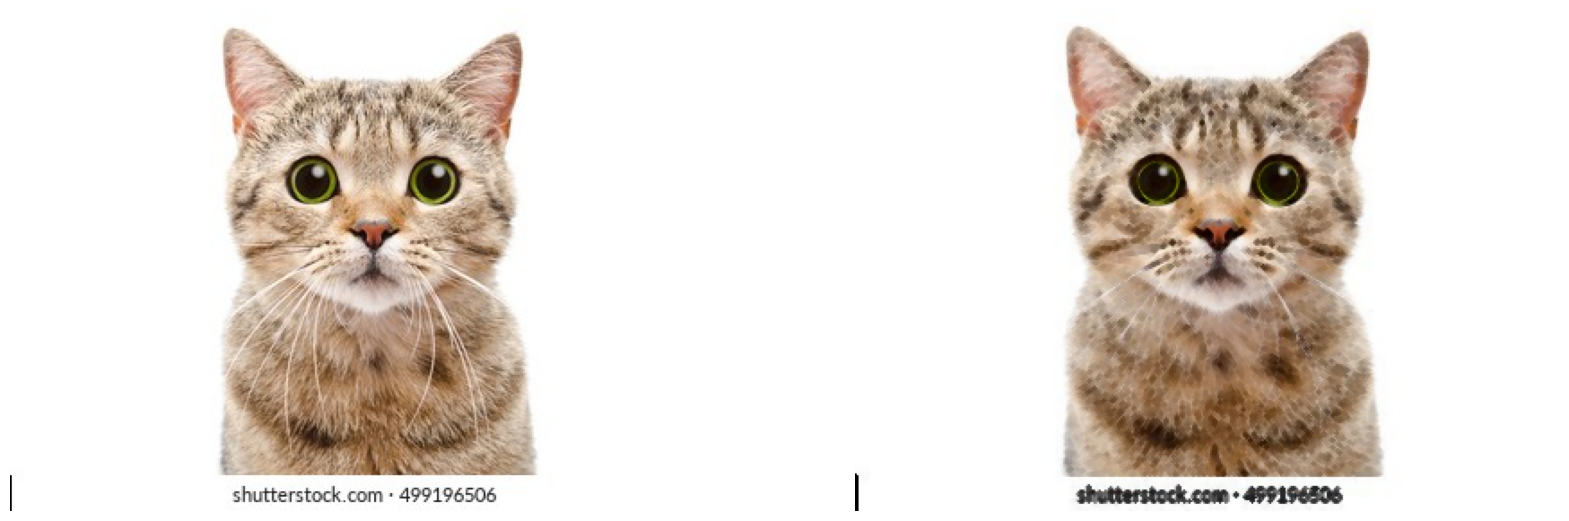

In [ ]:
eroded_image = morph.erosion(img_t, kernel) # Erosion
plot_morph_image(eroded_image) # Plot

### Open

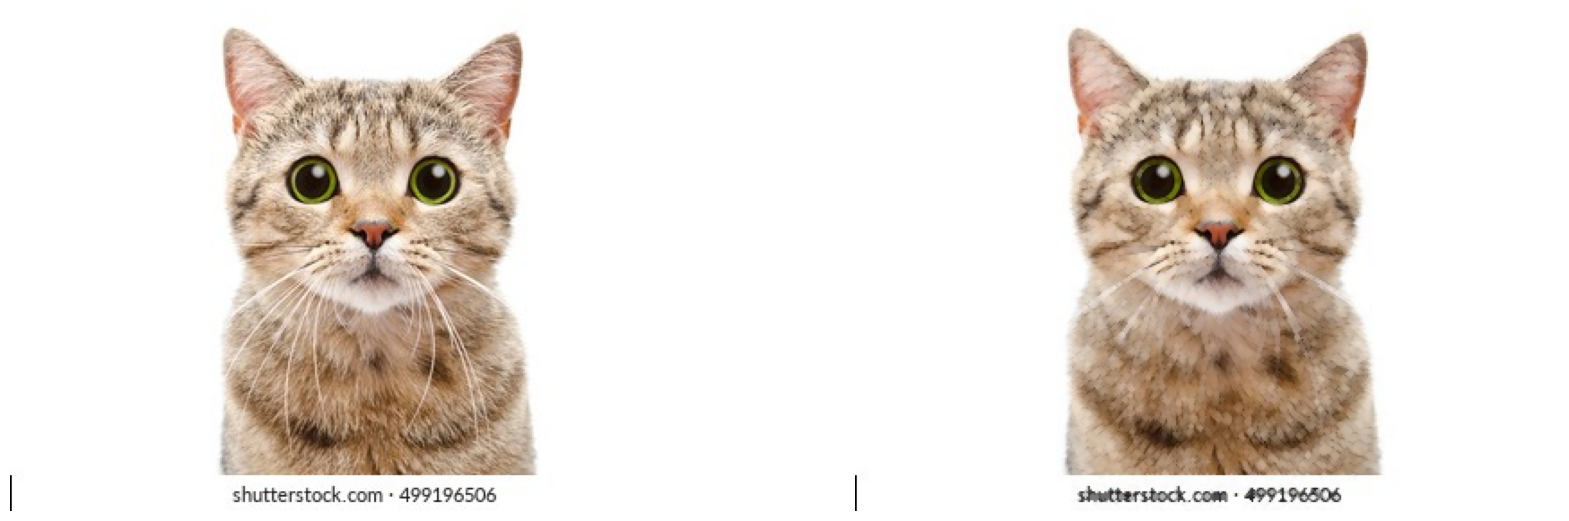

In [ ]:
opened_image = morph.opening(img_t, kernel) # Open
plot_morph_image(opened_image)

### Close

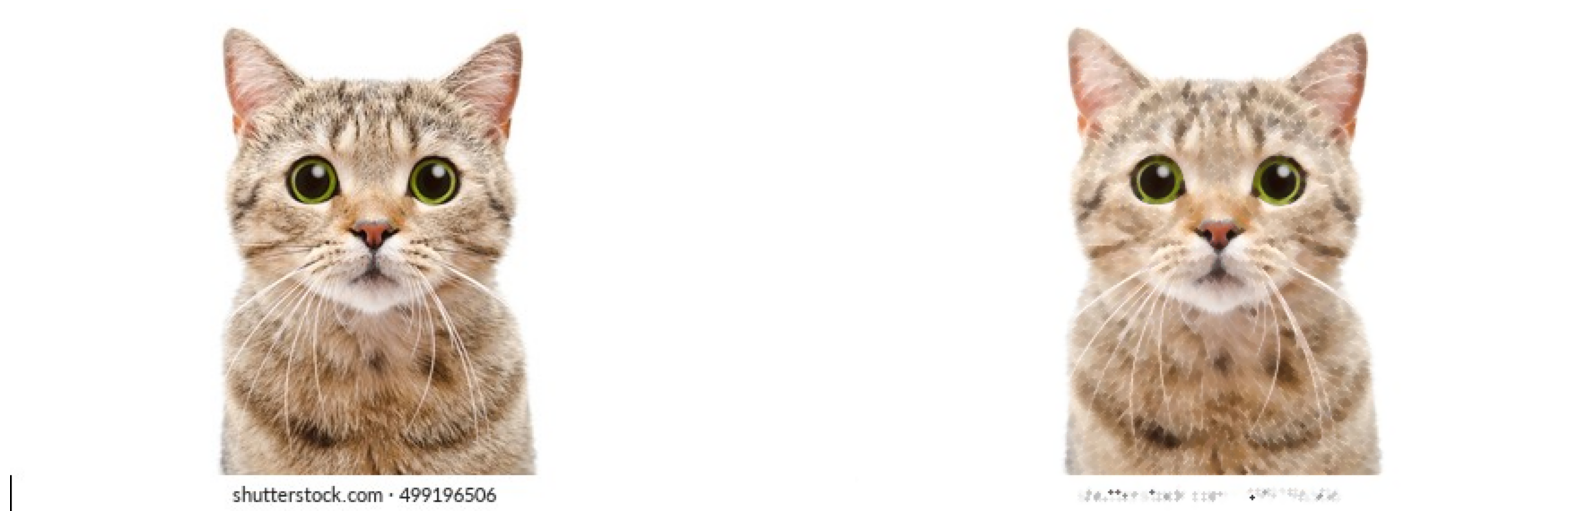

In [ ]:
closed_image = morph.closing(img_t, kernel) # Close
plot_morph_image(closed_image) # Plot

### Morphological Gradient

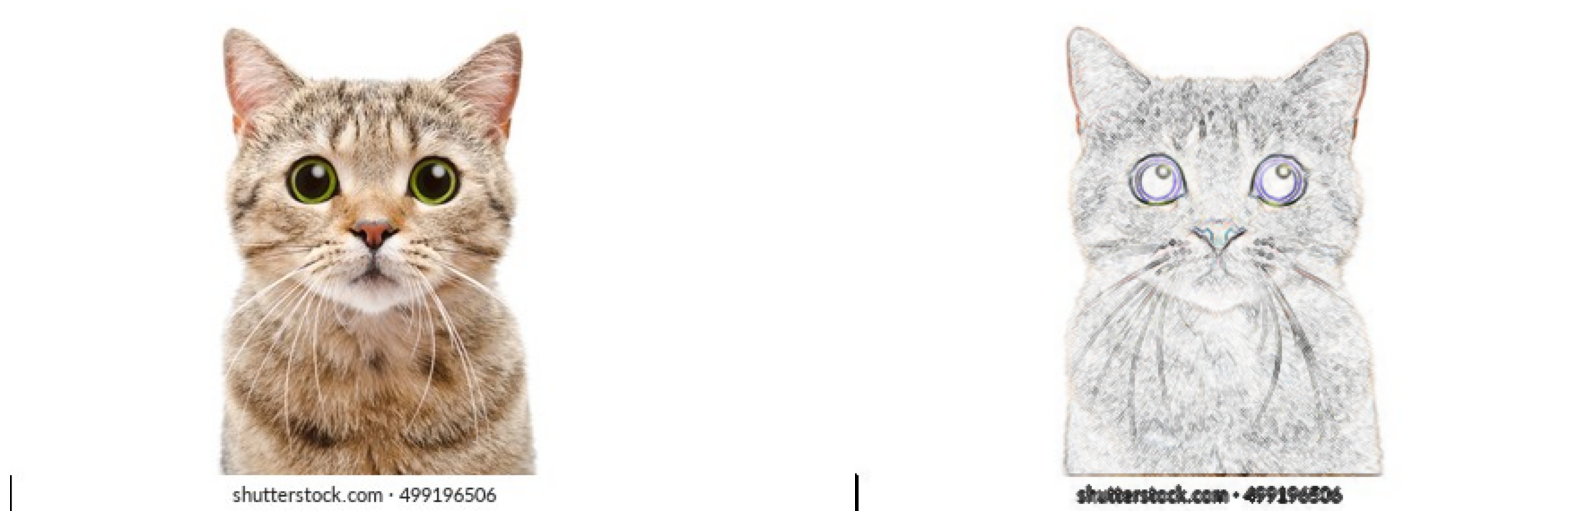

In [ ]:
graded_image = morph.gradient(img_t, kernel) # Morphological gradient
plot_morph_image(1. - graded_image)

### Bottom Hat

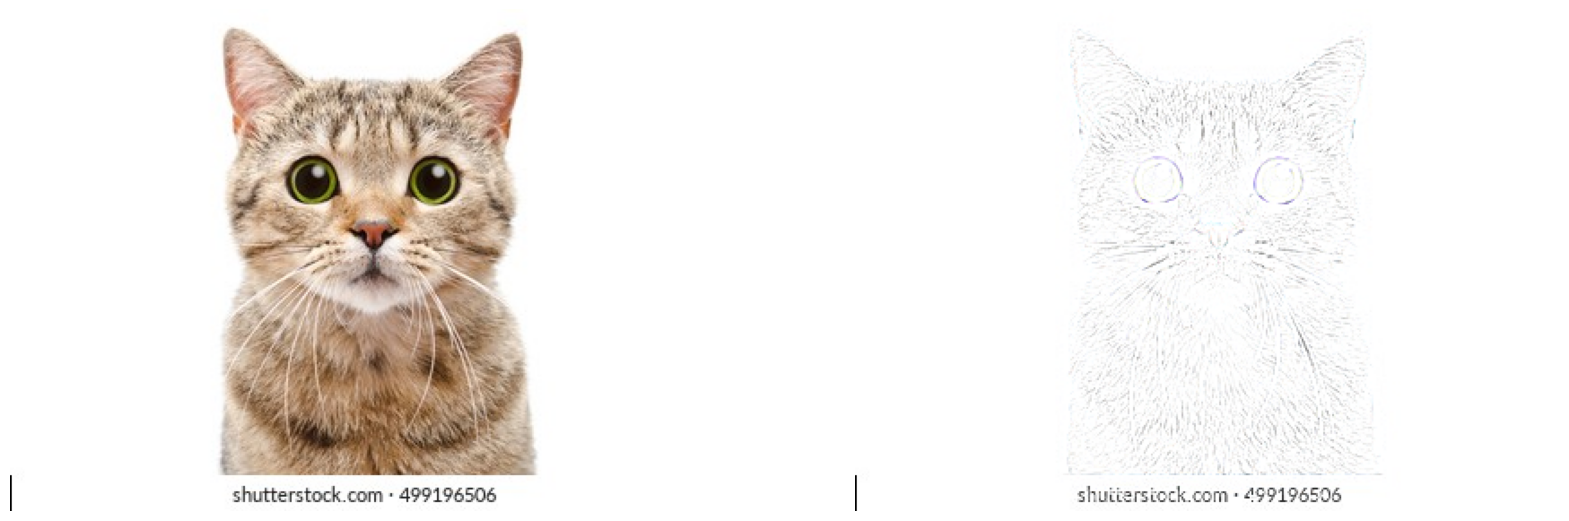

In [ ]:
bottom_image = morph.bottom_hat(img_t, kernel) # Black Hat
plot_morph_image(1. - bottom_image)

### Top Hat

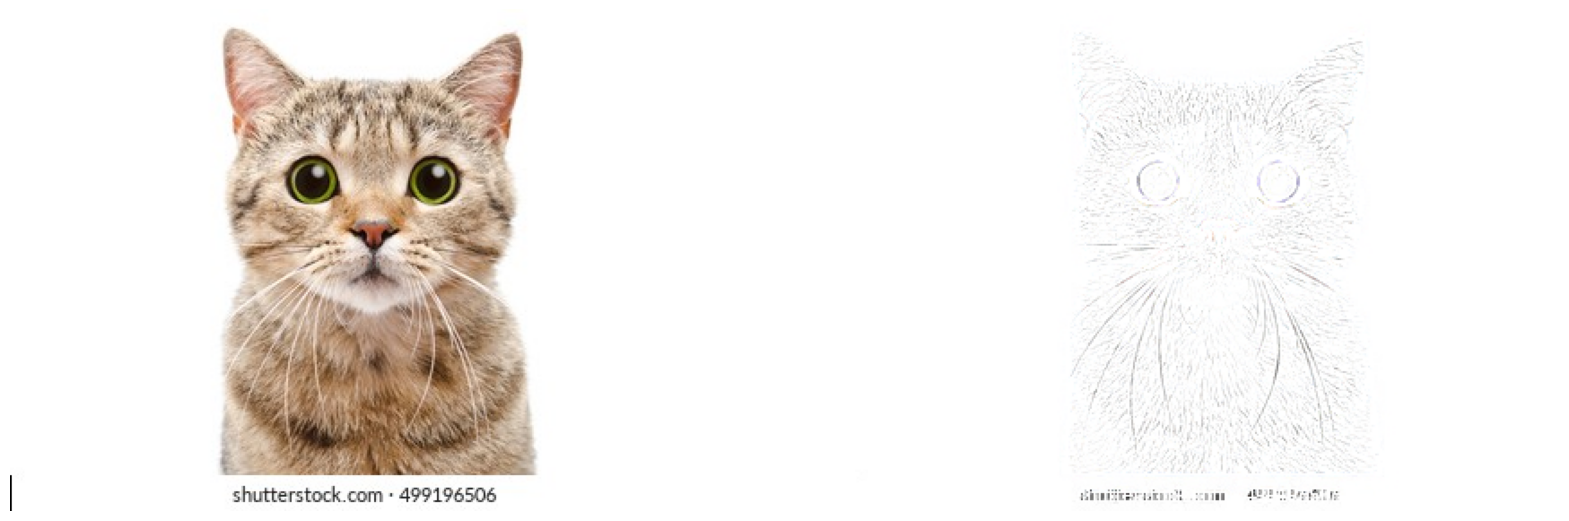

In [ ]:
toph_image = morph.top_hat(img_t, kernel) # Top Hat
plot_morph_image(1. - toph_image)